# Titanic Exploratory Data Analysis

This notebook is part of an Academic exercise, in which three hypotheses will be answered:

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine if the survival rate is associated to the age

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Load Data

The dataset contains 890 observations, each one with the information of a passanger aboard the Titanic during its first and last voyage. There are 12 columns, ```PassengerID```, ```Survived```, ```Pclass```, ```Name```, ```Sex```, ```Age```, ```SibSp```, ```Parch```, ```Ticket```, ```Fare```, ```Cabin```, ```Embarked```.

- ```PassengerID```: Unique identifier for the passenger
- ```Survived```: Target variable.
    - 0 = Not survived
    - 1 = Survived
- ```Pclass```: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
- ```Name```: Name of the passenger
- ```Sex```: Gender of the passenger
- ```Age```: Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- ```SibSp```: # of siblings / spouses aboard the Titanic. The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- ```Parch```: # of parents / children aboard the Titanic. The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.
- ```Ticket```: Ticket number of the passenger
- ```Fare```: Amount paid for the ticket
- ```Cabin```: Cabin number
- ```Embarked```: City where the passenger boarded the Titanic. C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
titanic_df = pd.read_csv("../data/titanic.csv")

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

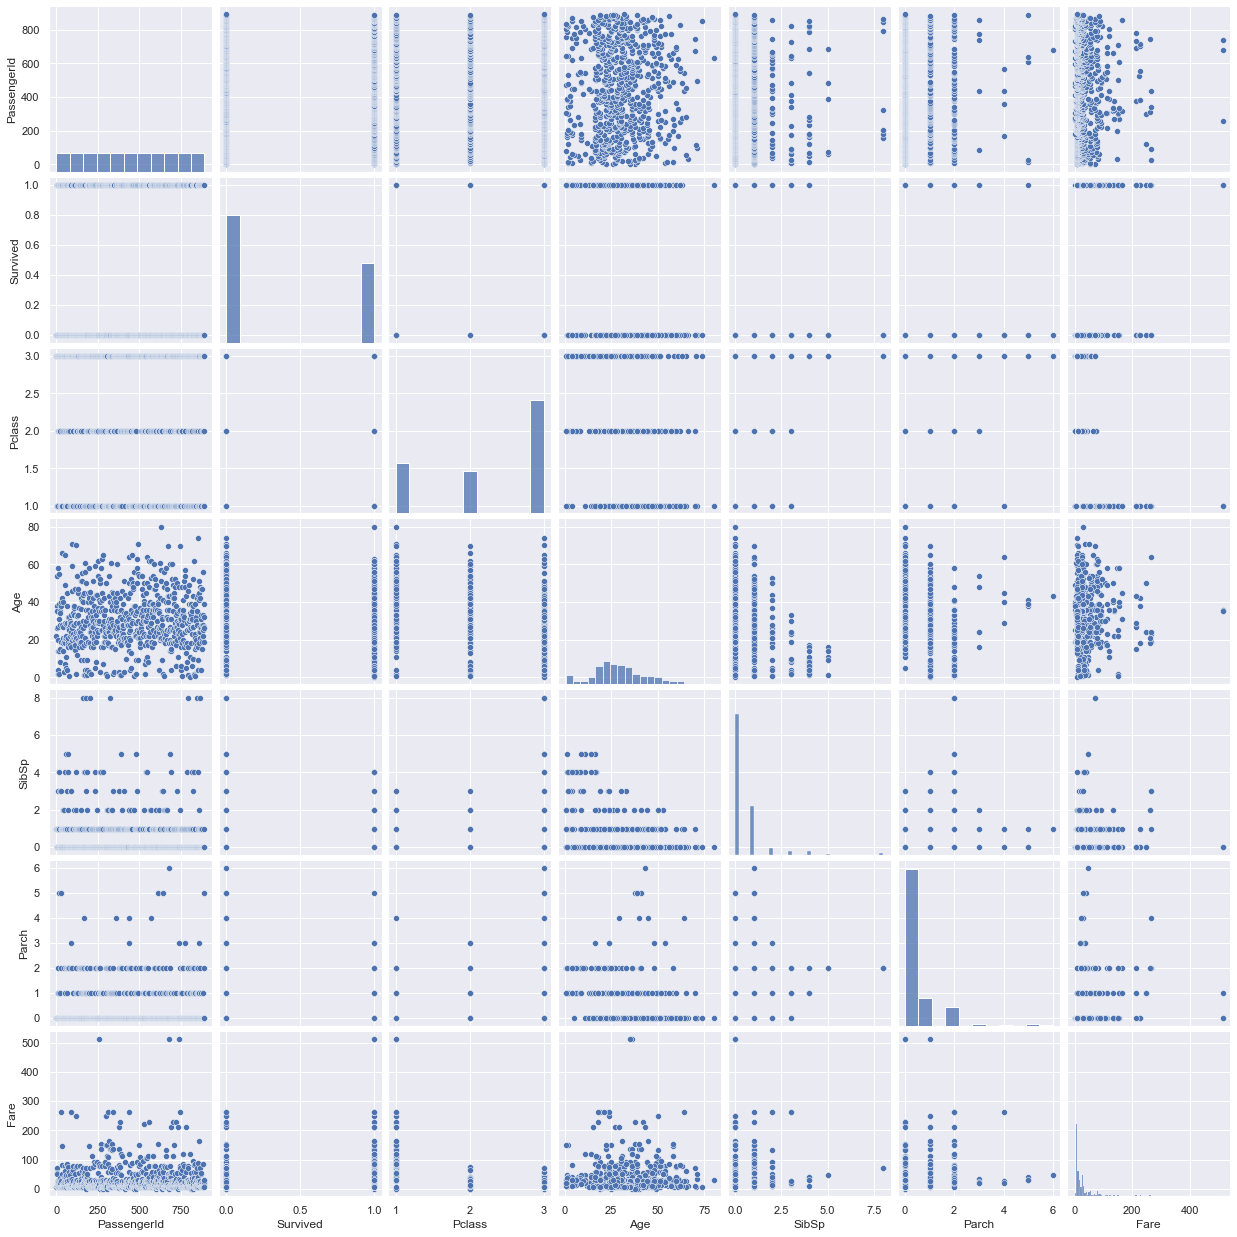

In [5]:
titanic_pair_plot = sns.pairplot(data=titanic_df)
titanic_pair_plot.savefig('../result/VariablesPairPlot.png')

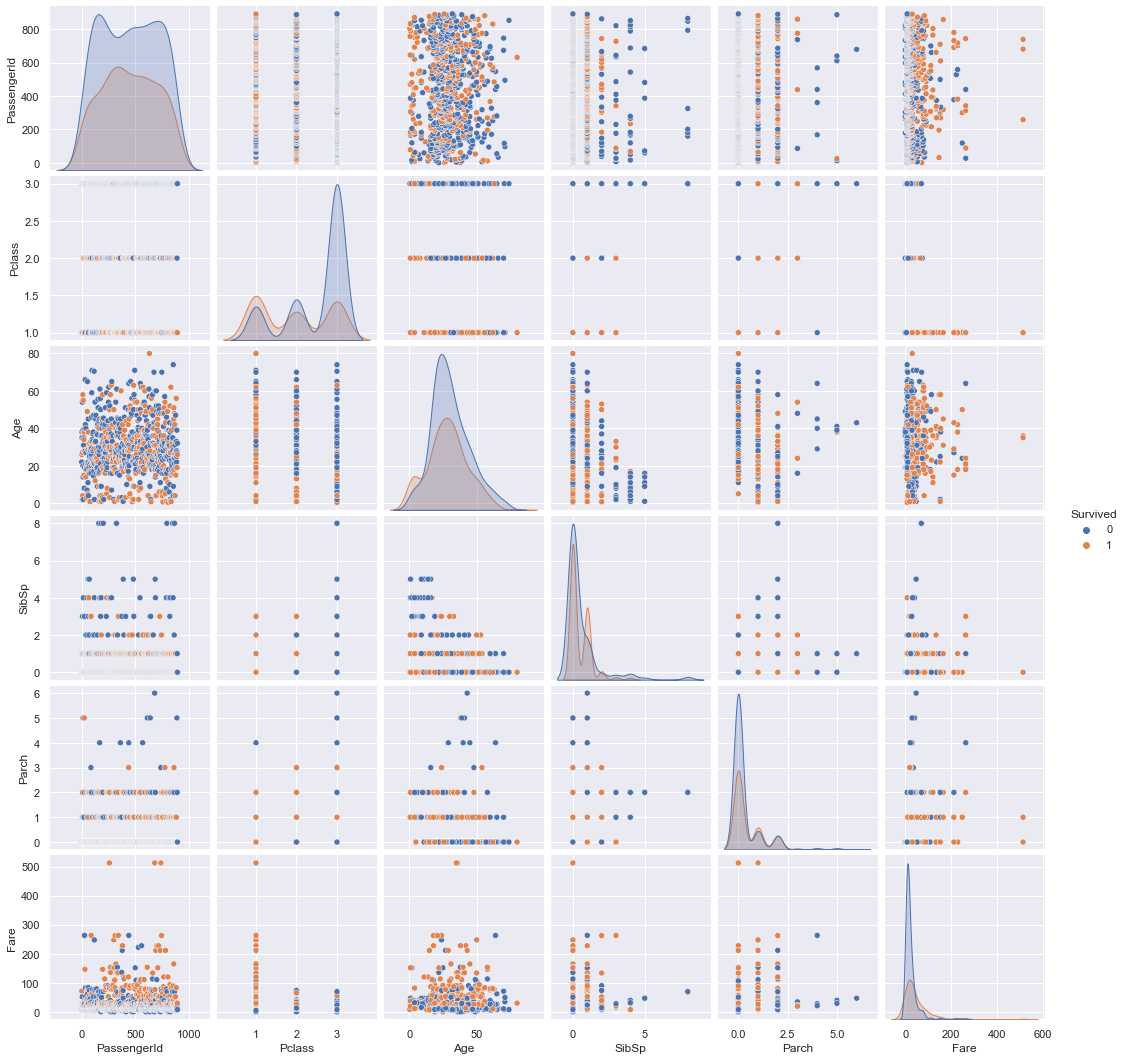

In [6]:
survived_pair_plot = sns.pairplot(data=titanic_df, hue="Survived")
titanic_pair_plot.savefig('../result/VariablesPairPlot.png')

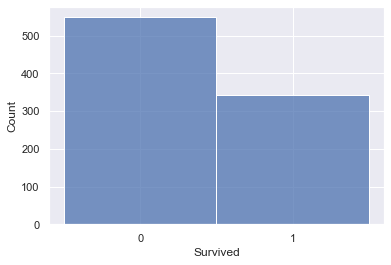

In [7]:
ax = plt.axes()
sns.histplot(data=titanic_df, x="Survived", discrete=True, ax=ax)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
plt.savefig('../result/Survived_Hist.png')

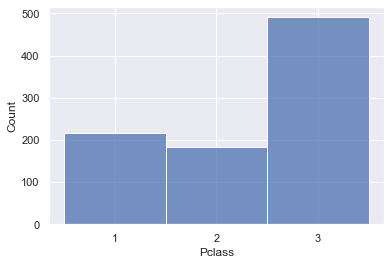

In [8]:
ax = plt.axes()
sns.histplot(data=titanic_df, x="Pclass", discrete=True, ax=ax)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
plt.savefig('../result/Pclass_Hist.png')

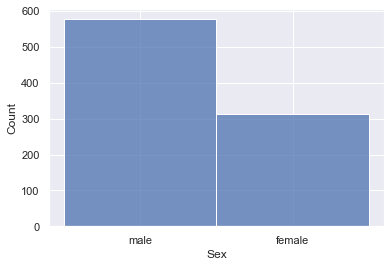

In [9]:
ax = plt.axes()
sns.histplot(data=titanic_df, x="Sex", discrete=True, ax=ax)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
plt.savefig('../result/Sex_Hist.png')

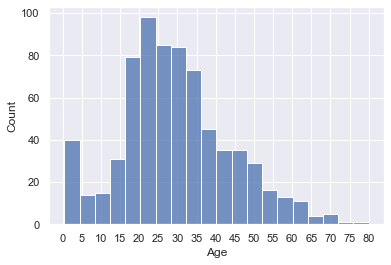

In [10]:
ax = plt.axes()
sns.histplot(data=titanic_df, x="Age", ax=ax)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
plt.savefig('../result/Age_Hist.png')

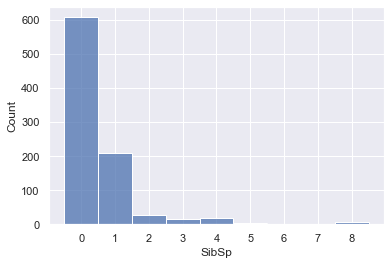

In [11]:
ax = plt.axes()
sns.histplot(data=titanic_df, x="SibSp", discrete=True, ax=ax)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
plt.savefig('../result/SibSp_Hist.png')

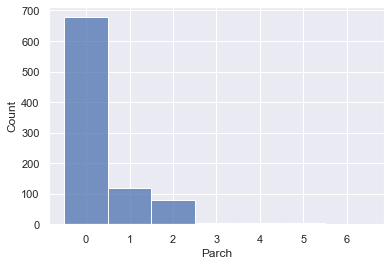

In [12]:
ax = plt.axes()
sns.histplot(data=titanic_df, x="Parch", discrete=True, ax=ax)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
plt.savefig('../result/Parch_Hist.png')

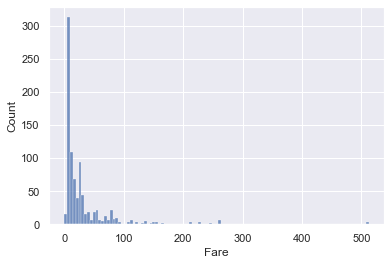

In [13]:
ax = plt.axes()
sns.histplot(data=titanic_df, x="Fare", ax=ax)
# ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
plt.savefig('../result/Fare_Hist.png')

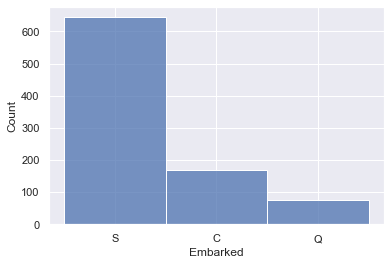

In [14]:
ax = plt.axes()
sns.histplot(data=titanic_df, x="Embarked", ax=ax)
# ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
plt.savefig('../result/Embarked_Hist.png')

## Survival Rate by Class

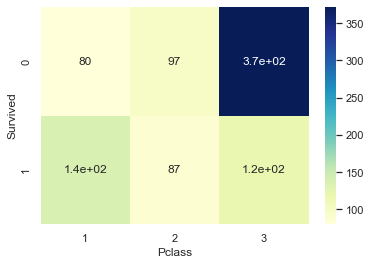

In [15]:
pclass_survived_df = pd.crosstab(titanic_df.Survived,titanic_df.Pclass)
sns.heatmap(pclass_survived_df, annot=True, cmap="YlGnBu")
plt.savefig('../result/Pclass_Survived_Heatmap.png')

In [16]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(pclass_survived_df)
print(c, p)

102.88898875696056 4.549251711298793e-23


## Survival Rate by Gender

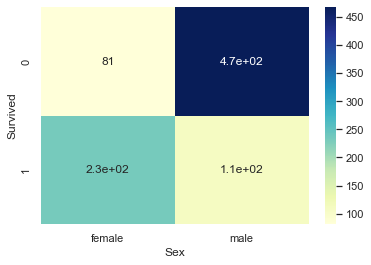

In [17]:
gender_survived_df = pd.crosstab(titanic_df.Survived, titanic_df.Sex)
sns.heatmap(gender_survived_df, annot=True, cmap="YlGnBu")
plt.savefig('../result/Gender_Survived_Heatmap.png')

In [18]:
c, p, dof, expected = chi2_contingency(gender_survived_df)
print(c, p)

260.71702016732104 1.1973570627755645e-58


## Survival Rate by Age

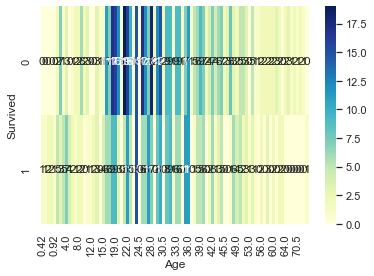

In [19]:
age_survived_df = pd.crosstab(titanic_df.Survived, titanic_df.Age)
sns.heatmap(age_survived_df, annot=True, cmap="YlGnBu")
plt.savefig('../result/Age_Survived_Heatmap.png')

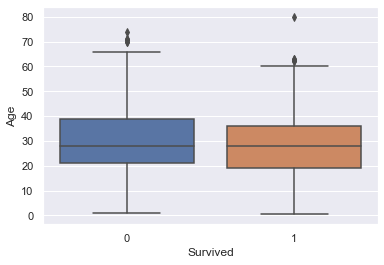

In [20]:
ax = plt.axes()
sns.boxplot(data=titanic_df, x="Survived", y="Age")
plt.savefig('../result/Age_Survived_Boxplot.png')

In [21]:
c, p, dof, expected = chi2_contingency(age_survived_df)
print(c, p)

104.15604988902831 0.10141111018860959


In [22]:
bins = [-1, *range(0, 100, 5)]
titanic_df['age_discrete'] = pd.cut(titanic_df['Age'], bins=bins)

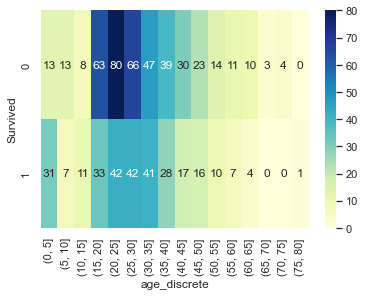

In [23]:
age_discrete_survived_df = pd.crosstab(titanic_df.Survived, titanic_df.age_discrete)
sns.heatmap(age_discrete_survived_df, annot=True, cmap="YlGnBu")
plt.savefig('../result/AgeDiscrete_Survived_Heatmap.png')

In [24]:
c, p, dof, expected = chi2_contingency(age_discrete_survived_df)
print(c, p)

31.330998516525035 0.007930788925480698
